In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [118]:
DATASET_PATH = './dataset/Student_Performance.csv'

df = pd.read_csv(DATASET_PATH)

df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [119]:
df['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

In [120]:
# Manual Encoding

df['Extracurricular Activities'] =  (df['Extracurricular Activities'] == 'Yes').astype(int)

df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


X_train shape: (10000, 5) | y shape: (10000,)


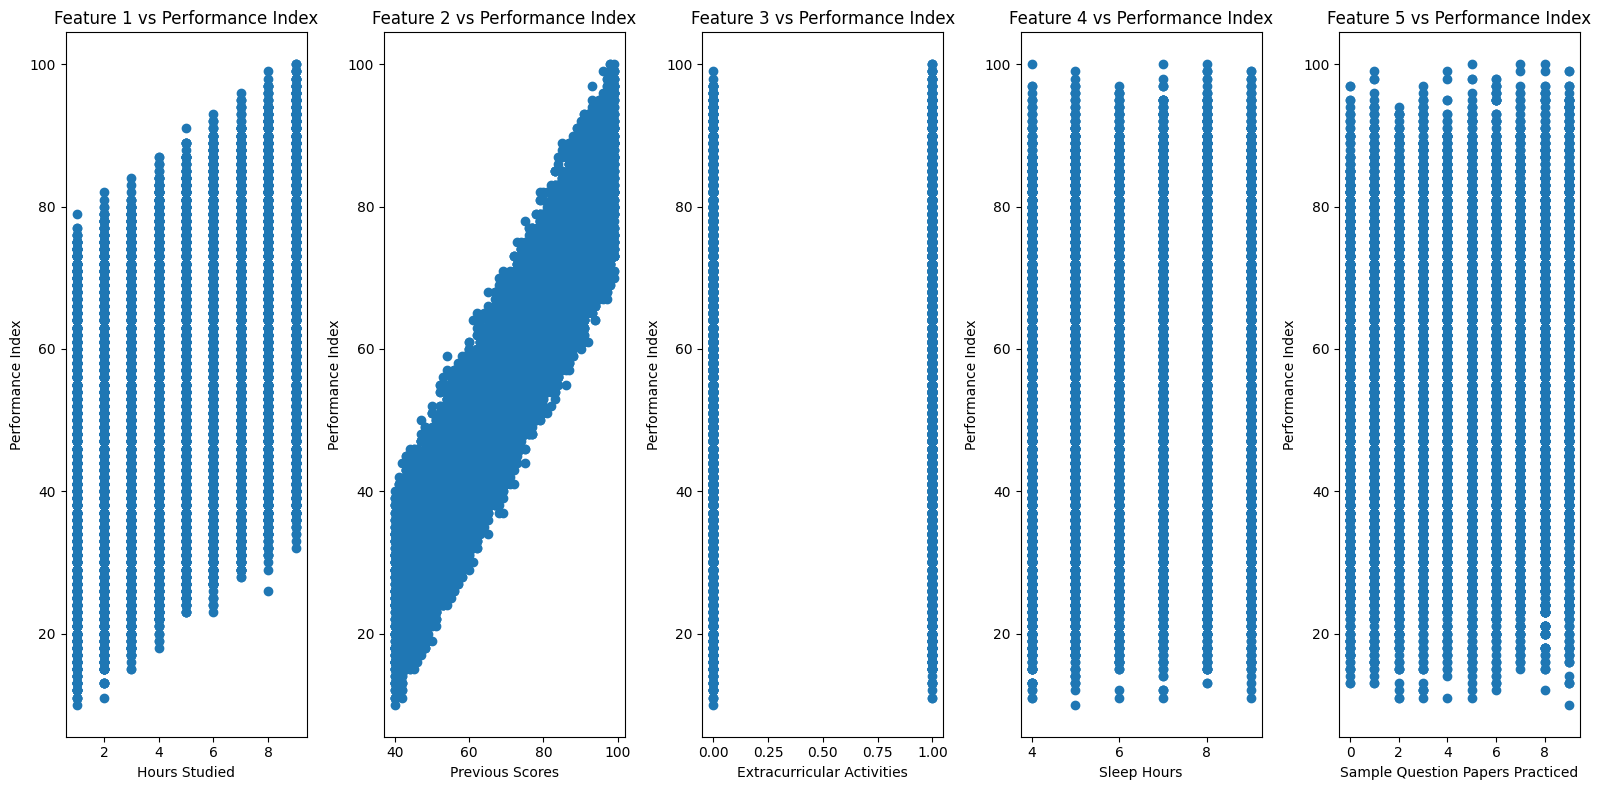

In [121]:
X_train = df.loc[:, df.columns != 'Performance Index']
y_train = df['Performance Index']

X_train = np.array(X_train)
y_train = np.array(y_train)

print(f'X_train shape: {X_train.shape} | y shape: {y_train.shape}')

m, n = X_train.shape


fig, axes = plt.subplots(1, n, figsize=(16, 8))

for j in range(n):

    axes[j].scatter(X_train[:, j], y_train)
    axes[j].set_xlabel(f'{df.columns[j]}')    
    axes[j].set_ylabel('Performance Index')
    axes[j].set_title(f'Feature {j+1} vs Performance Index')

plt.tight_layout()
plt.show()

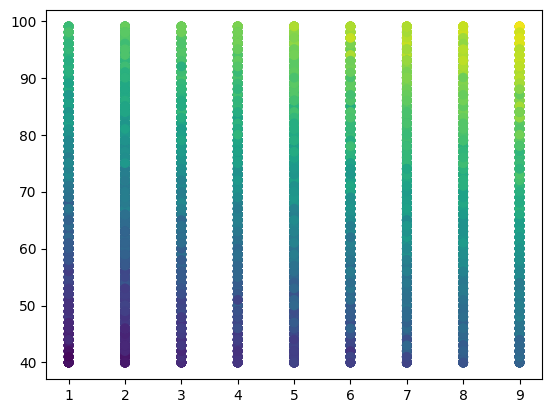

In [122]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

In [171]:
def scaler(A):

    mean = np.mean(A, axis= 0)

    A_norm = (A - mean) / np.std(A, axis= 0)

    return A_norm

In [170]:
feat_1_norm = scaler(X_train[:, 0].reshape(-1, 1))

print(feat_1_norm[:5])

from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

standard_scaler.fit(X_train[:, 0].reshape(-1, 1))
print(standard_scaler.transform(X_train[:5, 0].reshape(-1, 1)))

[4.9929]
[[ 0.77518771]
 [-0.38348058]
 [ 1.16141048]
 [ 0.00274218]
 [ 0.77518771]]
[[ 0.77518771]
 [-0.38348058]
 [ 1.16141048]
 [ 0.00274218]
 [ 0.77518771]]


In [172]:
X_train_norm = scaler(X_train)

print(f'Manual scaler: {X_train_norm[:5]}')

standard_scaler.fit(X_train)
print(f'Standard scaler: {standard_scaler.transform(X_train[:5])}')

Manual scaler: [[ 0.77518771  1.70417565  1.01045465  1.45620461 -1.24975394]
 [-0.38348058  0.72391268 -0.98965352 -1.49229423 -0.90098215]
 [ 1.16141048 -1.06362569  1.01045465  0.27680507 -0.90098215]
 [ 0.00274218 -1.00596317  1.01045465 -0.90259446 -0.90098215]
 [ 0.77518771  0.32027498 -0.98965352  0.86650484  0.1453332 ]]
Standard scaler: [[ 0.77518771  1.70417565  1.01045465  1.45620461 -1.24975394]
 [-0.38348058  0.72391268 -0.98965352 -1.49229423 -0.90098215]
 [ 1.16141048 -1.06362569  1.01045465  0.27680507 -0.90098215]
 [ 0.00274218 -1.00596317  1.01045465 -0.90259446 -0.90098215]
 [ 0.77518771  0.32027498 -0.98965352  0.86650484  0.1453332 ]]


f(x): w.X + b

Cost: 1/2m * sum((f(x) - y)^2)

In [190]:
def compute_cost(X, y, w, b):

    m, n = X.shape

    total_cost = 0

    for i in range(m):

        z = np.dot(w, X[i]) + b

        cost = (z - y[i]) ** 2
        total_cost += cost

    total_cost /= 2 * m

    return total_cost

dy/dw: 1/m * sum( (f(x) - y) * Xj )

dy/db: 1/m * sum( (f(x) - y) )

In [274]:
def compute_gradient(X, y, w, b):

    m, n = X.shape

    dy_dw = np.zeros(n)
    dy_db = 0

    print(X[0].shape, w.shape)
    for i in range(m):
        
        z = np.dot(w, X[i]) + b


        cost = z - y[i]

        for j in range(n):

            dy_dw_j = cost * X[i][j]
            dy_dw[j] += dy_dw_j
        
        dy_db += cost

    dy_dw /= m
    dy_db /= m


    return dy_dw, dy_db


In [253]:
def multi_linear_regression(X, y, w, b, a, max_epochs):

    J_history = []

    w_out = w
    b_out = b

    old_cost = compute_cost(X, y, w_out, b_out)

    for i in range(max_epochs):

        dy_dw, dy_db = compute_gradient(X, y, w, b)

        tmp_w_out = w_out - (a * dy_dw)
        tmp_b_out = b_out - (a * dy_db)

        J = compute_cost(X, y, tmp_w_out, tmp_b_out)

        if(J >= old_cost):
            print(f'Reach Local Minimum at {i - 1} iterations | Cost: {old_cost}')
            break

        w_out -= a * dy_dw
        b_out -= a * dy_db

        if i % 100 == 0:

            J_history.append(J)

            print(f'Epochs ({i}/{max_epochs}) | Cost: {J}')

        old_cost = J

    return w_out, b_out

In [275]:
w = np.random.random_sample(X_train[-1].shape)
b = np.random.rand()
a = 0.003
epochs = 10000

print(f'w = {w} | b = {b}')

print(f'Initial cost = {compute_cost(X_train_norm, y_train, w, b)}')

init_dy_dw, init_dy_db = compute_gradient(X_train_norm, y_train, w, b)
print(f'Initial dy_dw = {init_dy_dw} | Initial dy_db = {init_dy_db}')

w = [0.90024888 0.03951523 0.12235737 0.90683268 0.25532142] | b = 0.6988276190366685
Initial cost = 1663.6784338488628
(5,) (5,)
Initial dy_dw = [ -6.27413591 -17.54545543  -0.36275801  -0.01783151  -0.55467767] | Initial dy_db = -54.525972380963296


In [255]:
w_out, b_out = multi_linear_regression(X_train_norm, y_train, w, b, a, epochs)

Epochs (0/10000) | Cost: 1499.1574482183491
Epochs (100/10000) | Cost: 1353.1847338429786
Epochs (200/10000) | Cost: 1214.7822519145732
Epochs (300/10000) | Cost: 1083.9333247564073
Epochs (400/10000) | Cost: 960.6228495407967
Epochs (500/10000) | Cost: 844.8371495251604
Epochs (600/10000) | Cost: 736.563839345567
Epochs (700/10000) | Cost: 635.7917030391501
Epochs (800/10000) | Cost: 542.5105835920695
Epochs (900/10000) | Cost: 456.71128292364824
Epochs (1000/10000) | Cost: 378.38547132020193
Epochs (1100/10000) | Cost: 307.52560542544904
Epochs (1200/10000) | Cost: 244.1248539787766
Epochs (1300/10000) | Cost: 188.17703056914033
Epochs (1400/10000) | Cost: 139.67653274154534
Epochs (1500/10000) | Cost: 98.61828685582128
Epochs (1600/10000) | Cost: 64.99769815407255
Epochs (1700/10000) | Cost: 38.81060554462778
Epochs (1800/10000) | Cost: 20.053240656815653
Epochs (1900/10000) | Cost: 8.722190763028179
Epochs (2000/10000) | Cost: 4.814365202672077
Reach Local Minimum at 2003 iteration

In [289]:
rand_idx = np.random.randint(0, X_train.shape[0])

prediction = np.dot(w_out, X_train_norm[rand_idx]) + b_out

print(f'Prediction = {prediction} vs Actual = {y_train[rand_idx]}')

Prediction = 41.38295346823828 vs Actual = 40.0
